## Feature Extraction

    Convert data from higher dimensions to lower dimensions
    Also referred as compressing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
final_data = pd.get_dummies(loans,columns=['purpose'],drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [5]:
predictors = final_data.drop('not.fully.paid', axis =1)
target = final_data['not.fully.paid']

## Principal Component Analysis

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA()

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(predictors)
sclaed_predictors = scaling.transform(predictors)

In [9]:
x_pca = pca.fit_transform(sclaed_predictors)
pca.explained_variance_ratio_

array([ 0.28387444,  0.17671345,  0.12097711,  0.07857603,  0.06607724,
        0.06354075,  0.045078  ,  0.04232871,  0.03819946,  0.02561364,
        0.02338519,  0.016486  ,  0.00605275,  0.0051288 ,  0.00319153,
        0.00264919,  0.00155465,  0.00057307])

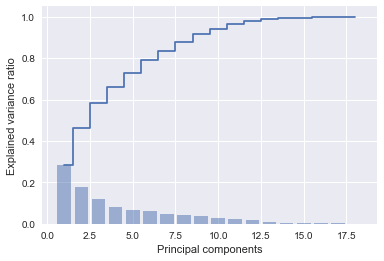

In [10]:
plt.bar(range(1, 19), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 19), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()


In [11]:
pca = PCA(n_components=2)


x_pca = pca.fit_transform(sclaed_predictors)


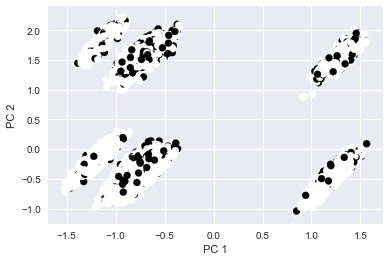

In [12]:
plt.scatter(x_pca[:, 0], x_pca[:, 1],c= target )
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [14]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(x_pca, target)

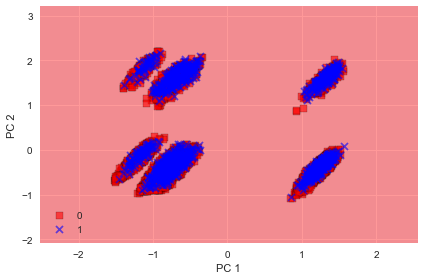

In [15]:
plot_decision_regions(x_pca, target, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Regular dataset

In [16]:
import pandas as pd

df_wine = pd.read_csv('wine.csv')


df_wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
df_wine.iloc[:, 0].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

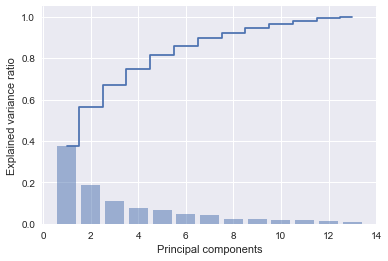

In [21]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [22]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

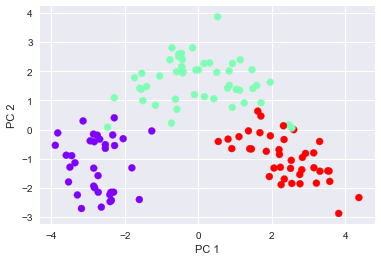

In [23]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= y_train, cmap  = 'rainbow_r' )
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)


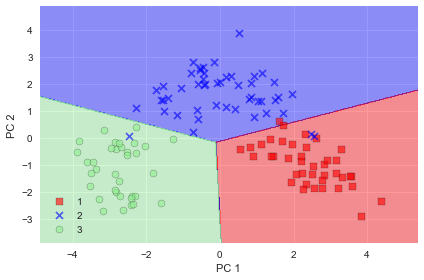

In [25]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

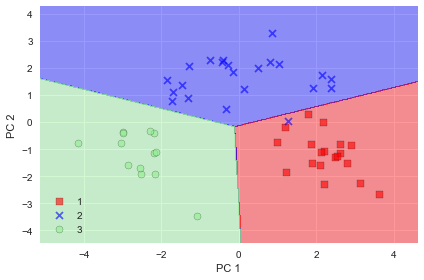

In [26]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show()

##  LDA - Linear Discriminant Analysis

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

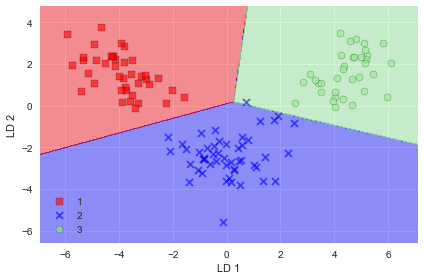

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda3.png', dpi=300)
plt.show()

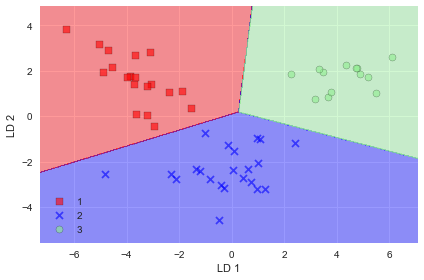

In [29]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda4.png', dpi=300)
plt.show()

##  Kernel PCA

Populating the interactive namespace from numpy and matplotlib


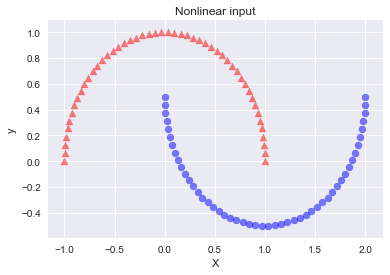

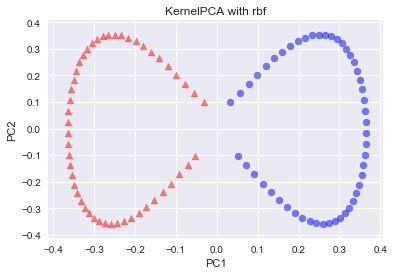

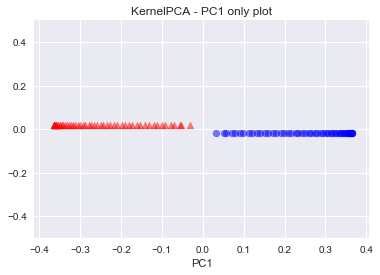

In [30]:
%pylab inline

from sklearn import cluster, datasets
from sklearn.decomposition import KernelPCA

#ccreate data : two moons
X, y = datasets.make_moons(n_samples=100, random_state=123)

# input
figure()
title("Nonlinear input")
scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
xlabel('X')
ylabel('y')

# Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)
figure()
title("KernelPCA with rbf")
scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
xlabel('PC1')
ylabel('PC2')

figure()
title("KernelPCA - PC1 only plot")
scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ylim([-0.5, 0.5])
xlabel('PC1')

show()

## Feature Ranking


In [31]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f],importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic.acid                     0.158610
 3) Ash                            0.150948
 4) Acl                            0.131987
 5) Mg                             0.106589
 6) Phenols                        0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid.phenols           0.032033
 9) Proanth                        0.025400
10) Color.int                      0.022351
11) Hue                            0.022078
12) OD                             0.014645
13) Proline                        0.013916


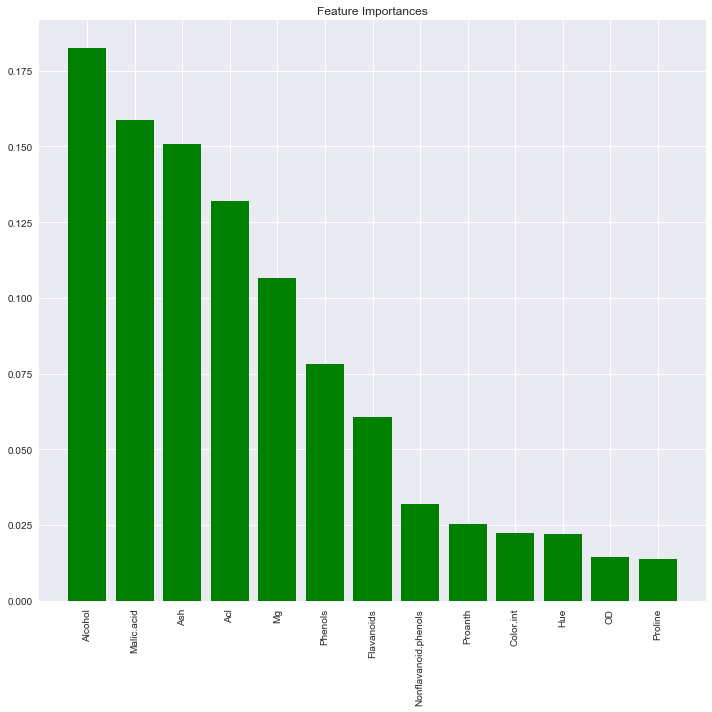

In [32]:
figure(figsize=(10,10))
title('Feature Importances')
bar(range(X_train.shape[1]), importances[indices], 
                     color='green', align='center')
xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
xlim([-1, X_train.shape[1]])
tight_layout()
show()